1

In [1]:
import pandas as pd

df = pd.read_csv("network_data.csv")

for col in ["cpu_percent", "mem_percent", "anomaly_score"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

for col in ["datetime", "last_seen"]:
    df[col] = pd.to_datetime(df[col], errors="coerce")

df["label"] = df["label"].astype("category")

print("Info du DataFrame :")
print(df.info())
print("\nValeurs de label :")
print(df["label"].value_counts())

df

Info du DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   src_ip         200 non-null    object        
 1   dst_ip         200 non-null    object        
 2   src_port       200 non-null    int64         
 3   dst_port       200 non-null    int64         
 4   protocol       200 non-null    object        
 5   bytes          194 non-null    float64       
 6   packets        196 non-null    float64       
 7   datetime       200 non-null    datetime64[ns]
 8   label          200 non-null    category      
 9   ip             200 non-null    object        
 10  hostname       200 non-null    object        
 11  os             200 non-null    object        
 12  last_seen      200 non-null    datetime64[ns]
 13  owner          200 non-null    object        
 14  cpu_percent    196 non-null    float64       
 15  mem

,src_ip,dst_ip,src_port,dst_port,protocol,bytes,packets,datetime,label,ip,hostname,os,last_seen,owner,cpu_percent,mem_percent,anomaly_score
0,10.0.0.103,9.9.9.9,1884,8080,TCP,42095.0,42.0,2025-09-27 07:12:35,malicious,10.0.0.103,host-E,MacOS,2025-09-28 07:12:35,dave,70.5,50.3,0.43
1,10.0.0.88,3.3.3.3,57125,80,UDP,10788.0,43.0,2025-09-01 18:15:25,benign,10.0.0.88,host-B,Linux,2025-09-04 08:15:25,bob,14.9,31.8,0.19
2,10.0.0.55,8.8.8.8,32575,8080,TCP,650.0,3.0,2025-09-01 18:55:48,benign,10.0.0.55,host-J,Linux,2025-09-01 20:55:48,bob,17.6,21.0,0.00
3,10.0.0.199,5.6.7.8,60924,53,TCP,1775.0,7.0,2025-09-30 22:03:51,benign,10.0.0.199,host-B,Windows,2025-10-03 12:03:51,alice,11.4,14.9,0.04
4,10.0.0.82,9.9.9.9,10292,443,UDP,113.0,8.0,2025-09-25 10:03:38,benign,10.0.0.82,host-D,Linux,2025-09-25 15:03:38,eve,17.5,33.2,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,10.0.0.23,8.8.8.8,17988,53,TCP,31184.0,50.0,2025-09-27 19:31:18,malicious,10.0.0.23,host-G,Windows,2025-09-29 09:31:18,dave,30.3,59.4,0.97
196,10.0.0.128,1.2.3.4,25941,443,UDP,338.0,10.0,2025-09-26 20:57:18,benign,10.0.0.128,host-J,Linux,2025-09-28 11:57:18,eve,3.4,40.6,0.01
197,10.0.0.54,9.9.9.9,19399,80,TCP,10392.0,47.0,2025-09-09 03:08:15,malicious,10.0.0.54,host-K,Windows,2025-09-11 14:08:15,alice,42.7,25.0,0.84
198,10.0.0.209,3.3.3.3,4575,22,UDP,2343.0,66.0,2025-09-26 22:02:12,malicious,10.0.0.209,host-G,Linux,2025-09-29 15:02:12,carol,34.1,43.1,0.48


2

In [2]:
df_fe = df.copy()

df_fe["hour"] = df_fe["datetime"].dt.hour
df_fe["weekday"] = df_fe["datetime"].dt.weekday

df_fe = df_fe[df_fe["label"].isin(["benign", "malicious"])].copy()

y = df_fe["label"]
X = df_fe.drop(
    columns=["label", "datetime", "src_ip", "dst_ip", "ip", "last_seen"],
    errors="ignore"
)

print("Forme de X :", X.shape)
print("Forme de y :", y.shape)
X

Forme de X : (195, 13)
Forme de y : (195,)


,src_port,dst_port,protocol,bytes,packets,hostname,os,owner,cpu_percent,mem_percent,anomaly_score,hour,weekday
0,1884,8080,TCP,42095.0,42.0,host-E,MacOS,dave,70.5,50.3,0.43,7,5
1,57125,80,UDP,10788.0,43.0,host-B,Linux,bob,14.9,31.8,0.19,18,0
2,32575,8080,TCP,650.0,3.0,host-J,Linux,bob,17.6,21.0,0.00,18,0
3,60924,53,TCP,1775.0,7.0,host-B,Windows,alice,11.4,14.9,0.04,22,1
4,10292,443,UDP,113.0,8.0,host-D,Linux,eve,17.5,33.2,0.05,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,17988,53,TCP,31184.0,50.0,host-G,Windows,dave,30.3,59.4,0.97,19,5
196,25941,443,UDP,338.0,10.0,host-J,Linux,eve,3.4,40.6,0.01,20,4
197,19399,80,TCP,10392.0,47.0,host-K,Windows,alice,42.7,25.0,0.84,3,1
198,4575,22,UDP,2343.0,66.0,host-G,Linux,carol,34.1,43.1,0.48,22,4


3  Construction du pipeline numérique

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_cols = X.select_dtypes(include=["int64", "float64", "int32", "float32"]).columns.tolist()
print("Colonnes numériques :", num_cols)

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])


Colonnes numériques : ['src_port', 'dst_port', 'bytes', 'packets', 'cpu_percent', 'mem_percent', 'anomaly_score', 'hour', 'weekday']


4

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


cat_cols = ["protocol", "hostname", "os", "owner"]
cat_cols = [c for c in cat_cols if c in X.columns]
print("Colonnes catégorielles :", cat_cols)

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])


Colonnes catégorielles : ['protocol', 'hostname', 'os', 'owner']


5

In [5]:
import pandas as pd
from sklearn.compose import ColumnTransformer

preproc = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ],
    remainder="drop"
)

X_prepared = preproc.fit_transform(X)

print("Shape de X_prepared :", X_prepared.shape)

num_features = num_cols

ohe = preproc.named_transformers_["cat"]["encoder"]
cat_feature_names = ohe.get_feature_names_out(cat_cols).tolist()

all_columns = num_features + cat_feature_names
print("Nombre total de features :", len(all_columns))

X_prepared_df = pd.DataFrame(X_prepared, columns=all_columns)
X_prepared_df


Shape de X_prepared : (195, 32)
Nombre total de features : 32


,src_port,dst_port,bytes,packets,cpu_percent,mem_percent,anomaly_score,hour,weekday,protocol_TCP,...,os_Linux,os_MacOS,os_Windows,owner_alice,owner_bob,owner_carol,owner_dave,owner_eve,owner_frank,owner_grace
0,-1.541077,-0.145037,0.705890,0.785453,2.810744,0.427622,0.435141,-0.639806,1.137620,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.348545,-0.622552,-0.184130,0.834262,-0.278556,-0.401534,-0.262277,0.939462,-1.371835,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.064350,-0.145037,-0.472341,-1.118106,-0.128536,-0.885582,-0.814400,0.939462,-1.371835,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.547268,-0.624164,-0.440359,-0.922869,-0.473026,-1.158980,-0.698163,1.513741,-0.869944,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.101260,-0.600885,-0.487607,-0.874060,-0.134092,-0.338788,-0.669104,-0.209096,0.133838,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-0.698687,-0.624164,0.395703,1.175926,0.577114,0.835477,2.004332,1.083031,1.137620,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
191,-0.282671,-0.600885,-0.481211,-0.776442,-0.917530,-0.007125,-0.785340,1.226601,0.635729,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
192,-0.624879,-0.622552,-0.195388,1.029499,1.266094,-0.706305,1.626564,-1.214085,-0.869944,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
193,-1.400313,-0.626014,-0.424211,1.956874,0.788253,0.104923,0.580437,1.513741,0.635729,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


6

Shape X_pca2 : (195, 2)
Explained variance ratio : [0.28577019 0.09695359]
Cumulative : [0.28577019 0.38272378]


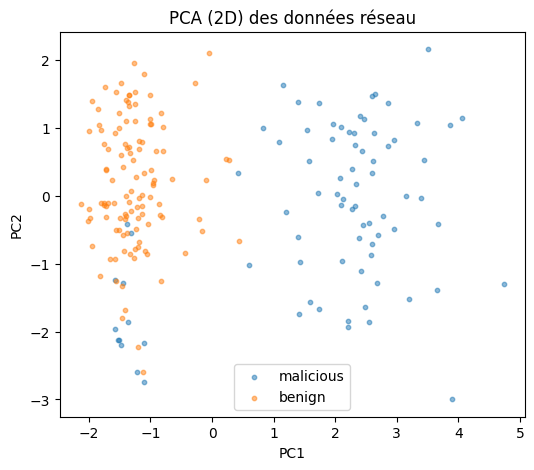

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
X_pca2 = pca.fit_transform(X_prepared)

print("Shape X_pca2 :", X_pca2.shape)
print("Explained variance ratio :", pca.explained_variance_ratio_)
print("Cumulative :", np.cumsum(pca.explained_variance_ratio_))

plt.figure(figsize=(6, 5))
for label in y.unique():
    idx = (y == label)
    plt.scatter(X_pca2[idx, 0], X_pca2[idx, 1], label=label, alpha=0.5, s=10)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D) des données réseau")
plt.legend()
plt.show()


7

In [8]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train_used, X_test_used, y_train_used, y_test_used = train_test_split(
    X_prepared,
    y,
    test_size=0.4,
    stratify=y,
    random_state=0
)

print("Train shape :", X_train_used.shape, "Test shape :", X_test_used.shape)
print("Distribution train AVANT SMOTE :", Counter(y_train_used))

smote = SMOTE(k_neighbors=1, random_state=13)
X_train_used, y_train_used = smote.fit_resample(X_train_used, y_train_used)

print("Train shape APRÈS SMOTE :", X_train_used.shape)
print("Distribution train APRÈS SMOTE :", Counter(y_train_used))


Train shape : (117, 32) Test shape : (78, 32)
Distribution train AVANT SMOTE : Counter({'benign': 69, 'malicious': 48})
Train shape APRÈS SMOTE : (138, 32)
Distribution train APRÈS SMOTE : Counter({'benign': 69, 'malicious': 69})


8

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

def select_features_anova(X, y, all_columns, keep=10):
    X = np.asarray(X)
    all_columns = np.array(all_columns)

    non_constant_mask = np.std(X, axis=0) > 0
    X_nc = X[:, non_constant_mask]
    cols_nc = all_columns[non_constant_mask]

    selector = SelectKBest(f_classif, k=min(keep, X_nc.shape[1]))
    selector.fit(X_nc, y)

    scores = selector.scores_
    feature_scores = {col: score for col, score in zip(cols_nc, scores)}

    feature_scores_sorted = dict(
        sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
    )

    print("Scores ANOVA (F-score) :")
    for name, score in feature_scores_sorted.items():
        print(f"{name:40s}: {score:.4f}")

    top_idx_nc = np.argsort(scores)[-keep:][::-1]
    top_features = cols_nc[top_idx_nc]
    print("\nTop features ANOVA :", top_features)

    top_idx = [int(np.where(all_columns == f)[0][0]) for f in top_features]

    return np.array(top_idx)

top_idx_anova = select_features_anova(X_train_used, y_train_used, all_columns, keep=10)


Scores ANOVA (F-score) :
packets                                 : 580.1006
anomaly_score                           : 333.2631
cpu_percent                             : 95.7366
mem_percent                             : 73.8153
bytes                                   : 57.9763
dst_port                                : 12.7434
hostname_host-J                         : 5.3862
hostname_host-H                         : 4.1384
owner_grace                             : 3.6947
hostname_host-B                         : 2.9218
hostname_host-K                         : 2.4540
hostname_host-F                         : 1.6903
owner_frank                             : 1.6464
owner_dave                              : 1.1475
hostname_host-C                         : 1.0960
protocol_UDP                            : 0.8748
protocol_TCP                            : 0.8748
owner_eve                               : 0.8382
hostname_host-D                         : 0.7890
hostname_host-I                     

9

In [11]:
# Q9 – Wrapper selection (RFE + LinearSVC)

import numpy as np
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

def select_features_rfe_svc(X, y, all_columns, keep=10):
    X = np.asarray(X)
    all_columns = np.array(all_columns)

    svc = LinearSVC(
        penalty="l2",
        dual=False,
        max_iter=10000,
        random_state=0
    )

    rfe = RFE(estimator=svc, n_features_to_select=min(keep, X.shape[1]), step=1)
    rfe.fit(X, y)

    ranking = rfe.ranking_
    # Scores inversés (1 = meilleur)
    scores = ranking
    order = np.argsort(scores)[::-1]

    feature_scores_sorted = {
        all_columns[i]: scores[i] for i in order
    }

    print("Scores RFE (plus grand = mieux) :")
    for name, sc in feature_scores_sorted.items():
        print(f"{name:40s}: {sc:.1f}")

    top_idx = np.where(ranking == 1)[0]
    top_features = all_columns[top_idx]
    print("\nTop features RFE+LinearSVC :", top_features)

    return top_idx

top_idx_rfe = select_features_rfe_svc(X_train_used, y_train_used, all_columns, keep=10)


Scores RFE (plus grand = mieux) :
hostname_host-D                         : 23.0
hostname_host-G                         : 22.0
os_MacOS                                : 21.0
hour                                    : 20.0
protocol_UDP                            : 19.0
os_Windows                              : 18.0
owner_bob                               : 17.0
owner_grace                             : 16.0
owner_eve                               : 15.0
weekday                                 : 14.0
src_port                                : 13.0
os_Linux                                : 12.0
owner_alice                             : 11.0
bytes                                   : 10.0
protocol_TCP                            : 9.0
hostname_host-A                         : 8.0
cpu_percent                             : 7.0
mem_percent                             : 6.0
owner_dave                              : 5.0
hostname_host-I                         : 4.0
hostname_host-J                 

10

In [12]:
# Q10 – Embedded selection (RandomForest top-k)

import numpy as np
from sklearn.ensemble import RandomForestClassifier

def embedded_rf_selection(X, y, all_columns, keep=10):
    X = np.asarray(X)
    all_columns = np.array(all_columns)

    rf = RandomForestClassifier(n_estimators=200, random_state=0)
    rf.fit(X, y)

    importances = rf.feature_importances_
    order = np.argsort(importances)[::-1]

    feature_importance_dict = {
        all_columns[i]: importances[i] for i in order
    }

    print("Importances RF (desc) :")
    for name, imp in feature_importance_dict.items():
        print(f"{name:40s}: {imp:.4f}")

    topk_idx = order[:keep]
    top_features = all_columns[topk_idx]
    print("\nTop features RF :", top_features)

    return topk_idx

top_idx_rf = embedded_rf_selection(X_train_used, y_train_used, all_columns, keep=10)


Importances RF (desc) :
packets                                 : 0.2532
anomaly_score                           : 0.1890
bytes                                   : 0.1628
cpu_percent                             : 0.1518
mem_percent                             : 0.0717
dst_port                                : 0.0462
src_port                                : 0.0173
weekday                                 : 0.0131
hour                                    : 0.0121
os_Linux                                : 0.0100
os_MacOS                                : 0.0087
hostname_host-H                         : 0.0060
hostname_host-J                         : 0.0054
owner_frank                             : 0.0046
owner_grace                             : 0.0043
hostname_host-K                         : 0.0042
os_Windows                              : 0.0039
hostname_host-I                         : 0.0038
protocol_TCP                            : 0.0037
hostname_host-F                         : 0.0

11

In [13]:
# Q11 – Fonction d'évaluation et expériences

import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Encoder y pour avoir 0/1 (pos_label = 1)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_used)
y_test_enc = le.transform(y_test_used)

def evaluate_models(X_train, X_test, y_train_enc, y_test_enc, models):
    results = {}
    for name, model in models.items():
        print(f"\n=== {name} ===")
        model.fit(X_train, y_train_enc)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test_enc, y_pred)
        prec = precision_score(y_test_enc, y_pred, average="binary", pos_label=1)
        rec = recall_score(y_test_enc, y_pred, average="binary", pos_label=1)
        f1 = f1_score(y_test_enc, y_pred, average="binary", pos_label=1)

        print(f"{name:10s} | acc={acc:.3f}  prec={prec:.3f}  rec={rec:.3f}  f1={f1:.3f}")
        results[name] = {
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1": f1
        }
    return results

def make_models_dict():
    return {
        "logreg": LogisticRegression(max_iter=1000, solver="liblinear", random_state=13),
        "knn": KNeighborsClassifier(n_neighbors=3),
        "nb": GaussianNB(),
        "tree": DecisionTreeClassifier(max_depth=5, random_state=13),
        "rf": RandomForestClassifier(n_estimators=100, random_state=13),
        "svc_linear": SVC(kernel="linear", probability=True, random_state=13),
        "svc_rbf": SVC(kernel="rbf", probability=True, random_state=13),
    }

# 1) Full feature set
models_full = make_models_dict()
results_full = evaluate_models(X_train_used, X_test_used, y_train_enc, y_test_enc, models_full)

# 2) Sélection ANOVA (top 5)
k_sel = 5
top_idx_anova5 = select_features_anova(X_train_used, y_train_used, all_columns, keep=k_sel)
X_train_anova = X_train_used[:, top_idx_anova5]
X_test_anova = X_test_used[:, top_idx_anova5]

models_anova = make_models_dict()
results_anova = evaluate_models(X_train_anova, X_test_anova, y_train_enc, y_test_enc, models_anova)

# 3) Sélection RFE+SVC (top 5)
top_idx_rfe5 = select_features_rfe_svc(X_train_used, y_train_used, all_columns, keep=k_sel)
X_train_rfe = X_train_used[:, top_idx_rfe5]
X_test_rfe = X_test_used[:, top_idx_rfe5]

models_rfe = make_models_dict()
results_rfe = evaluate_models(X_train_rfe, X_test_rfe, y_train_enc, y_test_enc, models_rfe)

# 4) Sélection RF embedded (top 5)
top_idx_rf5 = embedded_rf_selection(X_train_used, y_train_used, all_columns, keep=k_sel)
X_train_rf = X_train_used[:, top_idx_rf5]
X_test_rf = X_test_used[:, top_idx_rf5]

models_embrf = make_models_dict()
results_embrf = evaluate_models(X_train_rf, X_test_rf, y_train_enc, y_test_enc, models_embrf)



=== logreg ===
logreg     | acc=0.936  prec=0.886  rec=0.969  f1=0.925

=== knn ===
knn        | acc=0.962  prec=0.939  rec=0.969  f1=0.954

=== nb ===
nb         | acc=0.846  prec=0.794  rec=0.844  f1=0.818

=== tree ===
tree       | acc=1.000  prec=1.000  rec=1.000  f1=1.000

=== rf ===
rf         | acc=0.974  prec=0.941  rec=1.000  f1=0.970

=== svc_linear ===
svc_linear | acc=0.936  prec=0.886  rec=0.969  f1=0.925

=== svc_rbf ===
svc_rbf    | acc=0.949  prec=0.889  rec=1.000  f1=0.941
Scores ANOVA (F-score) :
packets                                 : 580.1006
anomaly_score                           : 333.2631
cpu_percent                             : 95.7366
mem_percent                             : 73.8153
bytes                                   : 57.9763
dst_port                                : 12.7434
hostname_host-J                         : 5.3862
hostname_host-H                         : 4.1384
owner_grace                             : 3.6947
hostname_host-B               

12

In [14]:
# Q12 – Hyperparameter tuning avec GridSearchCV pour RandomForest

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)

# Encoder y
le_gs = LabelEncoder()
y_train_enc_gs = le_gs.fit_transform(y_train_used)
y_test_enc_gs = le_gs.transform(y_test_used)

rf = RandomForestClassifier(random_state=13)

param_grid_rf = {
    "n_estimators": np.arange(50, 400, 25),
    "max_depth": [None, 5, 10],
}

grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    cv=4,
    scoring="f1",
    n_jobs=-1
)

grid_rf.fit(X_train_used, y_train_enc_gs)

print("Meilleurs hyperparamètres :", grid_rf.best_params_)
print("Meilleur F1 CV :", round(grid_rf.best_score_, 3))

best_rf = grid_rf.best_estimator_
y_pred_gs = best_rf.predict(X_test_used)

acc = accuracy_score(y_test_enc_gs, y_pred_gs)
prec = precision_score(y_test_enc_gs, y_pred_gs, average="binary", pos_label=1)
rec = recall_score(y_test_enc_gs, y_pred_gs, average="binary", pos_label=1)
f1 = f1_score(y_test_enc_gs, y_pred_gs, average="binary", pos_label=1)

print(f"\nPerformance sur test (RF optimisé) : acc={acc:.3f}  prec={prec:.3f}  rec={rec:.3f}  f1={f1:.3f}")

target_names = le_gs.inverse_transform([0, 1])
print("\nClassification report :")
print(classification_report(y_test_enc_gs, y_pred_gs, target_names=target_names))


Meilleurs hyperparamètres : {'max_depth': None, 'n_estimators': np.int64(125)}
Meilleur F1 CV : 0.95

Performance sur test (RF optimisé) : acc=0.974  prec=0.941  rec=1.000  f1=0.970

Classification report :
              precision    recall  f1-score   support

      benign       1.00      0.96      0.98        46
   malicious       0.94      1.00      0.97        32

    accuracy                           0.97        78
   macro avg       0.97      0.98      0.97        78
weighted avg       0.98      0.97      0.97        78



14

In [15]:
# Q14 – Ensemble VotingClassifier

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# Encoder y
le_v = LabelEncoder()
y_train_enc_v = le_v.fit_transform(y_train_used)
y_test_enc_v = le_v.transform(y_test_used)

clf_rf = RandomForestClassifier(n_estimators=100, random_state=13)
clf_svc = SVC(kernel="rbf", probability=True, random_state=13)
clf_knn = KNeighborsClassifier(n_neighbors=3)

voting = VotingClassifier(
    estimators=[
        ("rf", clf_rf),
        ("svc", clf_svc),
        ("knn", clf_knn)
    ],
    voting="soft"
)

voting.fit(X_train_used, y_train_enc_v)
y_pred_v = voting.predict(X_test_used)

acc = accuracy_score(y_test_enc_v, y_pred_v)
prec = precision_score(y_test_enc_v, y_pred_v, average="binary", pos_label=1)
rec = recall_score(y_test_enc_v, y_pred_v, average="binary", pos_label=1)
f1 = f1_score(y_test_enc_v, y_pred_v, average="binary", pos_label=1)

print(f"VotingClassifier | acc={acc:.3f}  prec={prec:.3f}  rec={rec:.3f}  f1={f1:.3f}")

print("\nClassification report :")
print(classification_report(y_test_enc_v, y_pred_v, target_names=le_v.inverse_transform([0, 1])))

print("\nMatrice de confusion :")
print(confusion_matrix(y_test_enc_v, y_pred_v))


VotingClassifier | acc=0.974  prec=0.941  rec=1.000  f1=0.970

Classification report :
              precision    recall  f1-score   support

      benign       1.00      0.96      0.98        46
   malicious       0.94      1.00      0.97        32

    accuracy                           0.97        78
   macro avg       0.97      0.98      0.97        78
weighted avg       0.98      0.97      0.97        78


Matrice de confusion :
[[44  2]
 [ 0 32]]
